In [ ]:
pip install quantstats

### Packages nécessaire à ce script

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import quantstats as qs

### import des données de rendements après application du modèle sur les données tests(The_bot&test)

In [2]:

# Charger le DataFrame depuis le fichier CSV exporté
df = pd.read_csv('/kaggle/input/crypto/df.csv')

# Afficher les premières lignes pour vérifier que tout est en ordre
print(df.head())


             timestamp     open     high      low    close     volume  \
0  2024-01-01 19:00:00  2326.90  2329.64  2326.40  2326.43   636.2559   
1  2024-01-01 19:05:00  2326.42  2328.91  2326.07  2327.88   766.1378   
2  2024-01-01 19:10:00  2327.88  2328.06  2324.17  2325.30   618.3842   
3  2024-01-01 19:15:00  2325.30  2325.80  2322.00  2323.20  1104.9367   
4  2024-01-01 19:20:00  2323.20  2326.25  2323.19  2326.24   426.7240   

         rsi      macd  macd_signal       atr  ...     SMA_Long  Signal  \
0  71.068152  0.796335     0.825194  5.524286  ...  2296.947789       0   
1  69.990319  0.705766     0.800437  5.585000  ...  2297.173158       0   
2  71.952736  0.716114     0.783084  5.573571  ...  2297.396053       0   
3  62.276423  0.555457     0.736510  5.105714  ...  2297.610947       0   
4  49.353050  0.293196     0.646221  4.450000  ...  2297.849842       0   

   Stratégie2  Strat_1  MM_courte  MM_longue       BH  Stratégie2_Frais  \
0      5000.0   5000.0   2327.166  

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


### Organisation du dataframe (Passage en journalier pour quantstats et sinon le code met 4h à faire un graph)

In [5]:
# Convertir la colonne 'timestamp' en datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extraire la date de chaque timestamp
df['date'] = df['timestamp'].dt.date

# Regrouper les résultats par jour en prenant la dernière valeur de chaque stratégie
grouped_df = df.groupby('date').last()

# Sélectionner les colonnes des différentes stratégies pour les afficher
strategies_columns = ['Stratégie2', 'Strat_1', 'BH', 'Stratégie2_Frais', 'BH_Frais', 'Strat_1_Frais']
grouped_strategies_df = grouped_df[strategies_columns]

# Afficher les résultats regroupés par jour pour les différentes stratégies
print(grouped_strategies_df)

            Stratégie2  Strat_1       BH  Stratégie2_Frais    BH_Frais  \
date                                                                     
2024-01-01     5000.00  5000.00  5023.30        5000.00000  5022.13655   
2024-01-02     5000.00  5000.00  5031.47        5000.00000  5030.30655   
2024-01-03     5000.00  5000.00  4883.31        5000.00000  4882.14655   
2024-01-04     5000.00  4995.25  4943.36        5000.00000  4942.19655   
2024-01-05     5000.00  4962.27  4938.38        5000.00000  4937.21655   
...                ...      ...      ...               ...         ...   
2025-02-22     5836.82  5911.82  5436.81        5796.74838  5435.64655   
2025-02-23     5836.82  5975.18  5499.85        5796.74838  5498.68655   
2025-02-24     5836.82  5662.98  5187.65        5796.74838  5186.48655   
2025-02-25     5836.82  5570.64  5167.92        5796.74838  5166.75655   
2025-02-26     5836.82  5570.64  5168.80        5796.74838  5167.63655   

            Strat_1_Frais  
date     

### plot de l'évolution du Capital (5000€ en base) selon les stratégies)

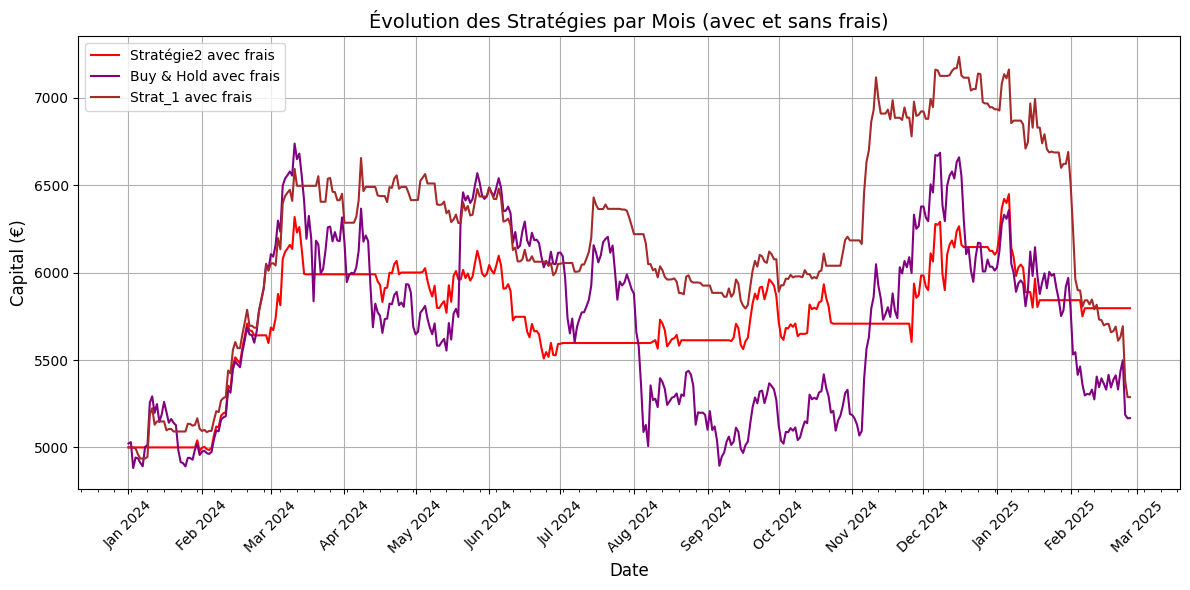

In [8]:
# S'assurer que l'index est de type datetime si ce n'est pas déjà fait
grouped_strategies_df.index = pd.to_datetime(grouped_strategies_df.index)

# Créer une figure pour le graphique
plt.figure(figsize=(12, 6))

# Tracer les courbes pour chaque stratégie
plt.plot(grouped_strategies_df.index, grouped_strategies_df['Stratégie2_Frais'], label='Stratégie2 avec frais', color='red')
plt.plot(grouped_strategies_df.index, grouped_strategies_df['BH_Frais'], label='Buy & Hold avec frais', color='purple')
plt.plot(grouped_strategies_df.index, grouped_strategies_df['Strat_1_Frais'], label='Strat_1 avec frais', color='brown')

# Format des axes x (par mois et année)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Placer une étiquette tous les mois
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format: Mois Année (Jan 2024)
plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator())  # Ajouter des sous-divisions pour les semaines

# Rotation des labels pour éviter les chevauchements
plt.xticks(rotation=45)

# Ajouter les titres et légende
plt.title('Évolution des Stratégies par Mois (avec et sans frais)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Capital (€)', fontsize=12)
plt.legend(loc='upper left')

# Ajouter une grille pour mieux voir les tendances
plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()


### Calcul des renta journalière

In [11]:
grouped_strategies_df['Rentabilité_Stratégie2_Frais'] = grouped_strategies_df['Stratégie2_Frais'].pct_change()
grouped_strategies_df['Rentabilité_BH_Frais'] = grouped_strategies_df['BH_Frais'].pct_change()
grouped_strategies_df['Rentabilité_Strat_1_Frais'] = grouped_strategies_df['Strat_1_Frais'].pct_change()

# Affichage des résultats (optionnel)
print(grouped_strategies_df[[
                             'Rentabilité_Stratégie2_Frais', 'Rentabilité_BH_Frais', 'Rentabilité_Strat_1_Frais']].head())


            Rentabilité_Stratégie2_Frais  Rentabilité_BH_Frais  \
date                                                             
2024-01-01                           NaN                   NaN   
2024-01-02                           0.0              0.001627   
2024-01-03                           0.0             -0.029453   
2024-01-04                           0.0              0.012300   
2024-01-05                           0.0             -0.001008   

            Rentabilité_Strat_1_Frais  
date                                   
2024-01-01                        NaN  
2024-01-02                   0.000000  
2024-01-03                   0.000000  
2024-01-04                  -0.001178  
2024-01-05                  -0.006828  


<ipython-input-11-a7135ecfbab4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_strategies_df['Rentabilité_Stratégie2_Frais'] = grouped_strategies_df['Stratégie2_Frais'].pct_change()
<ipython-input-11-a7135ecfbab4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_strategies_df['Rentabilité_BH_Frais'] = grouped_strategies_df['BH_Frais'].pct_change()
<ipython-input-11-a7135ecfbab4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

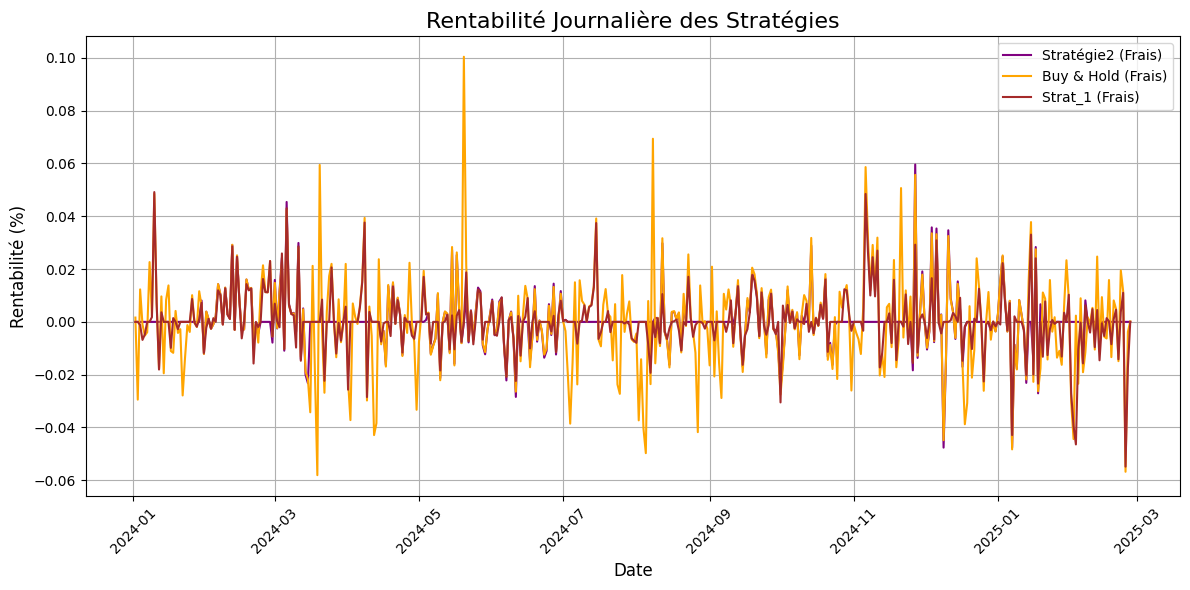

In [12]:

# Création du graphique
plt.figure(figsize=(12, 6))

# Tracé des courbes de rentabilité journalière
plt.plot(grouped_strategies_df.index, grouped_strategies_df['Rentabilité_Stratégie2_Frais'], label='Stratégie2 (Frais)', color='purple')
plt.plot(grouped_strategies_df.index, grouped_strategies_df['Rentabilité_BH_Frais'], label='Buy & Hold (Frais)', color='orange')
plt.plot(grouped_strategies_df.index, grouped_strategies_df['Rentabilité_Strat_1_Frais'], label='Strat_1 (Frais)', color='brown')

# Titres et légende
plt.title('Rentabilité Journalière des Stratégies', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rentabilité (%)', fontsize=12)
plt.legend()
plt.grid(True)

# Rotation de l'axe des x pour mieux visualiser les dates
plt.xticks(rotation=45)

# Affichage du graphique
plt.tight_layout()
plt.show()


Rapport Quanstat

In [18]:
pip install quantstats


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Comparaison Stratégie 1 et bench - Certains graphique ne s'affichent pas (idk la raison)

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2024-01-04   2024-01-04
End Period                 2025-02-26   2025-02-26
Risk-Free Rate             0.0%         0.0%
Time in Market             72.0%        100.0%

Cumulative Return          5.76%        5.85%
CAGR﹪                     3.43%        3.48%

Sharpe                     0.28         0.26
Prob. Sharpe Ratio         64.08%       63.23%
Smart Sharpe               0.28         0.26
Sortino                    0.41         0.39
Smart Sortino              0.41         0.38
Sortino/√2                 0.29         0.27
Smart Sortino/√2           0.29         0.27
Omega                      1.05         1.05

Max Drawdown               -26.91%      -27.36%
Longest DD Days            213          352
Volatility (ann.)          17.49%       28.5%
R^2                        0.41         0.41
Information Ratio          0.01         0.01
Calmar                

None

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2024-03-12,2024-09-06,2025-02-26,352,-27.363624,-25.915326
2,2024-01-12,2024-01-25,2024-02-11,31,-7.579158,-7.224490
3,2024-02-21,2024-02-23,2024-02-24,4,-1.531387,-0.752856
4,2024-03-05,2024-03-05,2024-03-05,1,-1.018857,NaN
5,2024-01-05,2024-01-07,2024-01-07,3,-1.009673,-0.618956


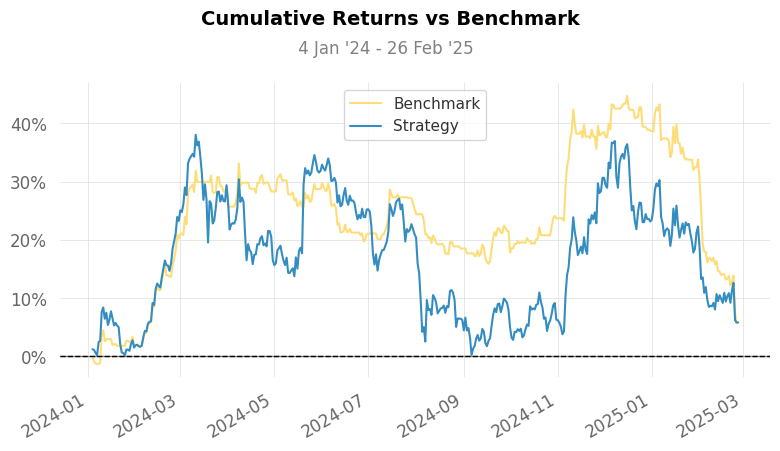

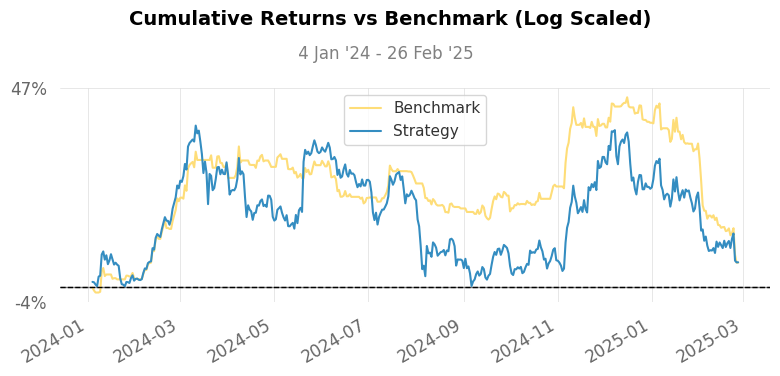

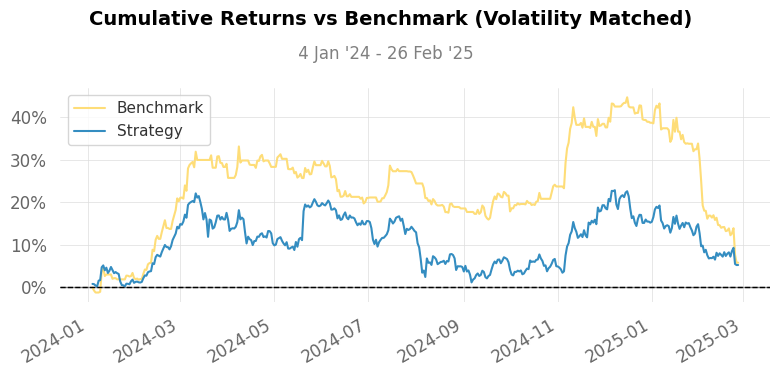

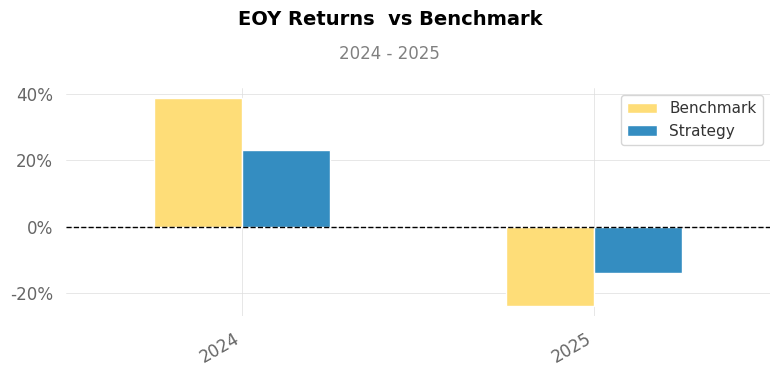

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

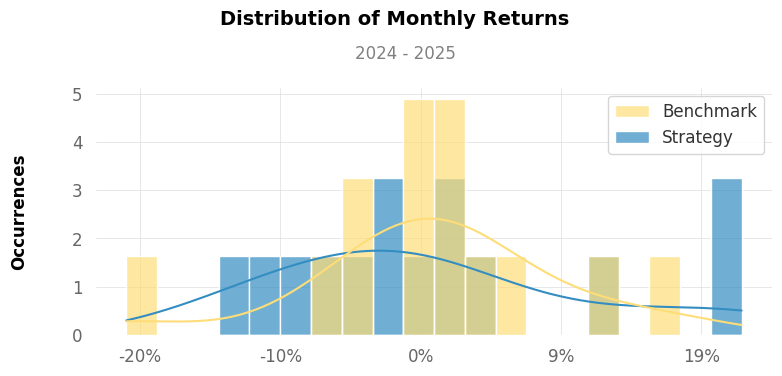

/usr/local/lib/python3.10/dist-packages/quantstats/_plotting/core.py:294: FutureWarning: Passing additional kwargs to DatetimeIndexResampler.sum has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  returns = returns.last() if compound is True else returns.sum(axis=0)


UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [23]:
qs.reports.full(grouped_strategies_df["Rentabilité_BH_Frais"], grouped_strategies_df["Rentabilité_Strat_1_Frais"])

# Comparaison Stratégie 2 et bench

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2024-01-30   2024-01-30
End Period                 2025-02-26   2025-02-26
Risk-Free Rate             0.0%         0.0%
Time in Market             53.0%        100.0%

Cumulative Return          15.93%       3.62%
CAGR﹪                     9.95%        2.31%

Sharpe                     0.67         0.22
Prob. Sharpe Ratio         80.14%       60.95%
Smart Sharpe               0.66         0.22
Sortino                    1.04         0.33
Smart Sortino              1.04         0.32
Sortino/√2                 0.74         0.23
Smart Sortino/√2           0.73         0.23
Omega                      1.04         1.04

Max Drawdown               -12.82%      -27.36%
Longest DD Days            297          352
Volatility (ann.)          16.03%       28.8%
R^2                        0.3          0.3
Information Ratio          -0.01        -0.01
Calmar                

None

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2024-03-12,2024-09-06,2025-02-26,352,-27.363624,-25.915326
2,2024-02-21,2024-02-23,2024-02-24,4,-1.531387,-0.752856
3,2024-01-31,2024-01-31,2024-02-05,6,-1.213167,-1.091591
4,2024-03-05,2024-03-05,2024-03-05,1,-1.018857,NaN
5,2024-02-16,2024-02-17,2024-02-17,2,-0.616990,-0.334620


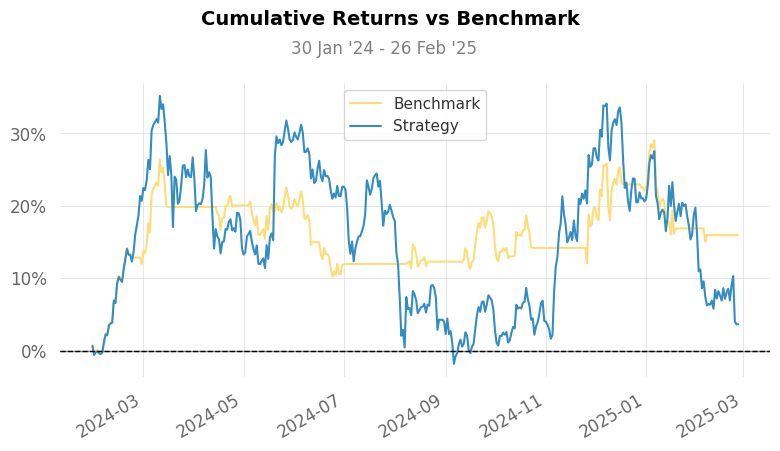

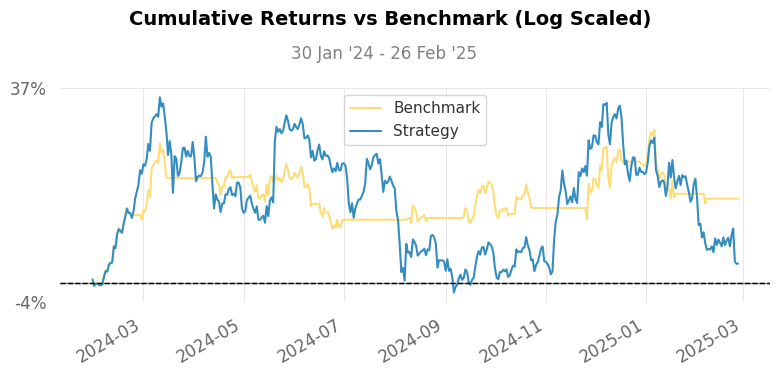

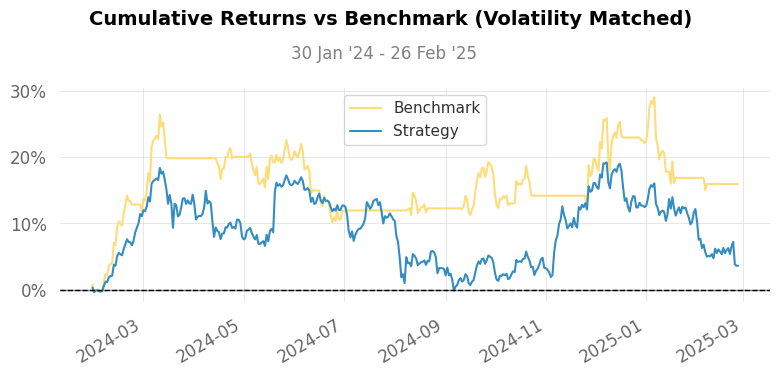

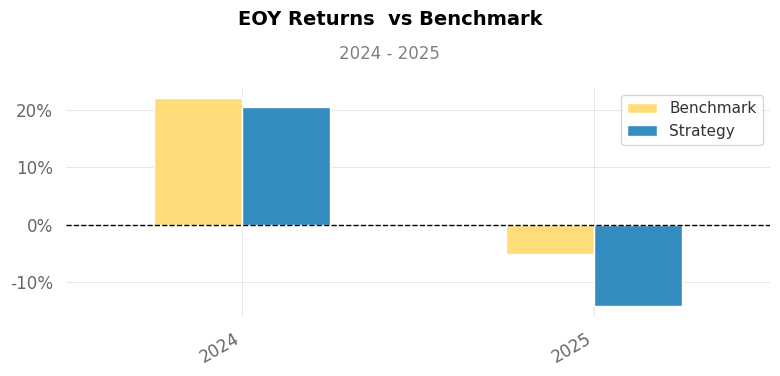

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

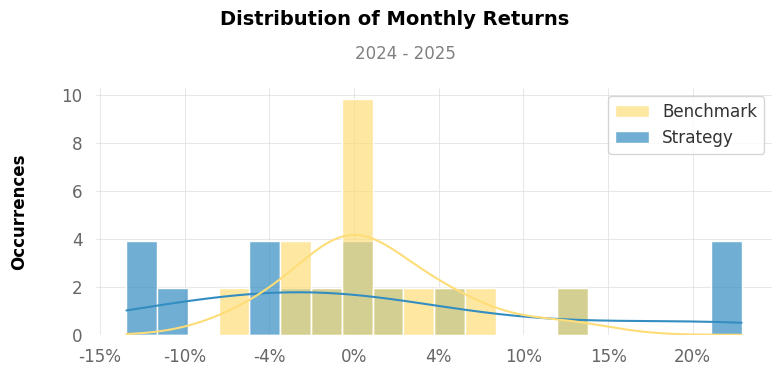

/usr/local/lib/python3.10/dist-packages/quantstats/_plotting/core.py:294: FutureWarning: Passing additional kwargs to DatetimeIndexResampler.sum has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  returns = returns.last() if compound is True else returns.sum(axis=0)


UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [22]:
qs.reports.full(grouped_strategies_df["Rentabilité_BH_Frais"], grouped_strategies_df["Rentabilité_Stratégie2_Frais"])